In [1]:
# Loading libraries

import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab
import matplotlib
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_control = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/control_20yr.nc')
data_pole_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_90_n_20yr.nc')
data_85_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_85_n_20yr.nc')
data_80_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_80_n_20yr.nc')
data_75_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_75_n_20yr.nc')
data_70_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_70_n_20yr.nc')
data_65_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_65_n_20yr.nc')
data_60_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_60_n_20yr.nc')
data_55_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_55_n_20yr.nc')
data_50_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_50_n_20yr.nc')
data_45_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_45_n_20yr.nc')
data_40_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_40_n_20yr.nc')
data_35_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_35_n_20yr.nc')
data_30_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_30_n_20yr.nc')
data_25_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_25_n_20yr.nc')
data_20_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_20_n_20yr.nc')
data_15_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_15_n_20yr.nc')
data_10_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_10_n_20yr.nc')
data_05_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_05_n_20yr.nc')
data_00 = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_00_20yr.nc')

# Radiation global average calculation

In [3]:
# Weights

weights = np.cos(np.deg2rad(data_control.lat))
weights.name='weights'
weights

<xarray.DataArray 'weights' (lat: 96)>
array([6.12323400e-17, 3.30633693e-02, 6.60905843e-02, 9.90455303e-02,
       1.31892171e-01, 1.64594590e-01, 1.97117027e-01, 2.29423920e-01,
       2.61479941e-01, 2.93250037e-01, 3.24699469e-01, 3.55793847e-01,
       3.86499169e-01, 4.16781860e-01, 4.46608807e-01, 4.75947393e-01,
       5.04765538e-01, 5.33031729e-01, 5.60715057e-01, 5.87785252e-01,
       6.14212713e-01, 6.39968541e-01, 6.65024572e-01, 6.89353409e-01,
       7.12928448e-01, 7.35723911e-01, 7.57714870e-01, 7.78877279e-01,
       7.99187997e-01, 8.18624815e-01, 8.37166478e-01, 8.54792713e-01,
       8.71484244e-01, 8.87222819e-01, 9.01991230e-01, 9.15773327e-01,
       9.28554038e-01, 9.40319390e-01, 9.51056516e-01, 9.60753676e-01,
       9.69400266e-01, 9.76986831e-01, 9.83505075e-01, 9.88947871e-01,
       9.93309266e-01, 9.96584493e-01, 9.98769969e-01, 9.99863305e-01,
       9.99863305e-01, 9.98769969e-01, 9.96584493e-01, 9.93309266e-01,
       9.88947871e-01, 9.83505075e-01, 9.76986831e-01, 9.69400266e-01,
       9.60753676e-01, 9.51056516e-01, 9.40319390e-01, 9.28554038e-01,
       9.15773327e-01, 9.01991230e-01, 8.87222819e-01, 8.71484244e-01,
       8.54792713e-01, 8.37166478e-01, 8.18624815e-01, 7.99187997e-01,
       7.78877279e-01, 7.57714870e-01, 7.35723911e-01, 7.12928448e-01,
       6.89353409e-01, 6.65024572e-01, 6.39968541e-01, 6.14212713e-01,
       5.87785252e-01, 5.60715057e-01, 5.33031729e-01, 5.04765538e-01,
       4.75947393e-01, 4.46608807e-01, 4.16781860e-01, 3.86499169e-01,
       3.55793847e-01, 3.24699469e-01, 2.93250037e-01, 2.61479941e-01,
       2.29423920e-01, 1.97117027e-01, 1.64594590e-01, 1.31892171e-01,
       9.90455303e-02, 6.60905843e-02, 3.30633693e-02, 6.12323400e-17])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [12]:
# All Sky

#Control
control_Sw = data_control.FSNT.weighted(weights)
control_Rw = control_Sw.mean(('lat','lon'))
control_Rw.load()

#Equator
data_00_Sw = data_00.FSNT.weighted(weights)
data_00_Rw = data_00_Sw.mean(('lat','lon')) 
data_00_Rw.load()

#5 deg
data_05_Sw = data_05_n.FSNT.weighted(weights)
data_05_Rw = data_05_Sw.mean(('lat','lon'))
data_05_Rw.load()

#10 deg
data_10_Sw = data_10_n.FSNT.weighted(weights)
data_10_Rw = data_10_Sw.mean(('lat','lon'))
data_10_Rw.load()

#15 deg
data_15_Sw = data_15_n.FSNT.weighted(weights)
data_15_Rw = data_15_Sw.mean(('lat','lon'))
data_15_Rw.load()

#20 deg
data_20_Sw = data_20_n.FSNT.weighted(weights)
data_20_Rw = data_20_Sw.mean(('lat','lon')) 
data_20_Rw.load()

#25 deg
data_25_Sw = data_25_n.FSNT.weighted(weights)
data_25_Rw = data_25_Sw.mean(('lat','lon')) 
data_25_Rw.load()

#30 deg
data_30_Sw = data_30_n.FSNT.weighted(weights)
data_30_Rw = data_30_Sw.mean(('lat','lon')) 
data_30_Rw.load()

#35 deg
data_35_Sw = data_35_n.FSNT.weighted(weights)
data_35_Rw = data_35_Sw.mean(('lat','lon')) 
data_35_Rw.load()

#40 deg
data_40_Sw = data_40_n.FSNT.weighted(weights)
data_40_Rw = data_40_Sw.mean(('lat','lon'))
data_40_Rw.load()

#45 deg
data_45_Sw = data_45_n.FSNT.weighted(weights)
data_45_Rw = data_45_Sw.mean(('lat','lon')) 
data_45_Rw.load()

#50 deg
data_50_Sw = data_50_n.FSNT.weighted(weights)
data_50_Rw = data_50_Sw.mean(('lat','lon')) 
data_50_Rw.load()

#55 deg
data_55_Sw = data_55_n.FSNT.weighted(weights)
data_55_Rw = data_55_Sw.mean(('lat','lon')) 
data_55_Rw.load()

#60 deg
data_60_Sw = data_60_n.FSNT.weighted(weights)
data_60_Rw = data_60_Sw.mean(('lat','lon'))
data_60_Rw.load()

#65 deg
data_65_Sw = data_65_n.FSNT.weighted(weights)
data_65_Rw = data_65_Sw.mean(('lat','lon')) 
data_65_Rw.load()

#70 deg
data_70_Sw = data_70_n.FSNT.weighted(weights)
data_70_Rw = data_70_Sw.mean(('lat','lon')) 
data_70_Rw.load()

#75 deg
data_75_Sw = data_75_n.FSNT.weighted(weights)
data_75_Rw = data_75_Sw.mean(('lat','lon')) 
data_75_Rw.load()

#80 deg
data_80_Sw = data_80_n.FSNT.weighted(weights)
data_80_Rw = data_80_Sw.mean(('lat','lon')) 
data_80_Rw.load()

#85 deg
data_85_Sw = data_85_n.FSNT.weighted(weights)
data_85_Rw = data_85_Sw.mean(('lat','lon')) 
data_85_Rw.load()

#90 deg
data_pole_Sw = data_pole_n.FSNT.weighted(weights)
data_pole_Rw = data_pole_Sw.mean(('lat','lon')) 
data_pole_Rw.load()

Rw = [data_00_Rw, data_05_Rw, data_10_Rw, data_15_Rw, data_20_Rw, data_25_Rw, data_30_Rw, data_35_Rw,
      data_40_Rw, data_45_Rw, data_50_Rw, data_55_Rw, data_60_Rw, data_65_Rw, data_70_Rw, data_75_Rw,
      data_80_Rw, data_85_Rw, data_pole_Rw]

In [13]:
#Difference in TOA radiation response

data_00_dRw = data_00_Rw - control_Rw
data_05_dRw = data_05_Rw - control_Rw
data_10_dRw = data_10_Rw - control_Rw
data_15_dRw = data_15_Rw - control_Rw
data_20_dRw = data_20_Rw - control_Rw
data_25_dRw = data_25_Rw - control_Rw
data_30_dRw = data_30_Rw - control_Rw
data_35_dRw = data_35_Rw - control_Rw
data_40_dRw = data_40_Rw - control_Rw
data_45_dRw = data_45_Rw - control_Rw
data_50_dRw = data_50_Rw - control_Rw
data_55_dRw = data_55_Rw - control_Rw
data_60_dRw = data_60_Rw - control_Rw
data_65_dRw = data_65_Rw - control_Rw
data_70_dRw = data_70_Rw - control_Rw
data_75_dRw = data_75_Rw - control_Rw
data_80_dRw = data_80_Rw - control_Rw
data_85_dRw = data_85_Rw - control_Rw
data_pole_dRw = data_pole_Rw - control_Rw

dRw = [data_00_dRw, data_05_dRw, data_10_dRw, data_15_dRw, data_20_dRw, data_25_dRw, data_30_dRw, 
       data_35_dRw, data_40_dRw, data_45_dRw, data_50_dRw, data_55_dRw, data_60_dRw, data_65_dRw, 
       data_70_dRw, data_75_dRw, data_80_dRw, data_85_dRw, data_pole_dRw]

In [14]:
# Clear Sky

# Control
control_clr = data_control.FSNTC.weighted(weights).mean(('lat','lon')) 
control_clr.load()

# Equator
clr_00 = data_00.FSNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_00.load()

# 5 deg.
clr_05 = data_05_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_05.load()

# 10 deg.
clr_10 = data_10_n.FSNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_10.load()

# 15 deg.
clr_15 = data_15_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_15.load()

# 20 deg.
clr_20 = data_20_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_20.load()

# 25 deg.
clr_25 = data_25_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_25.load()

# 30 deg.
clr_30 = data_30_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_30.load()

# 35 deg.
clr_35 = data_35_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_35.load()

# 40 deg.
clr_40 = data_40_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_40.load()

# 45 deg.
clr_45 = data_45_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_45.load()

# 50 deg.
clr_50 = data_50_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_50.load()

# 55 deg.
clr_55 = data_55_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_55.load()

# 60 deg.
clr_60 = data_60_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_60.load()

# 65 deg.
clr_65 = data_65_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_65.load()

# 70 deg.
clr_70 = data_70_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_70.load()

# 75 deg.
clr_75 = data_75_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_75.load()

# 80 deg.
clr_80 = data_80_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_80.load()

# 85 deg.
clr_85 = data_85_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_85.load()

# 90 deg.
clr_90 = data_pole_n.FSNTC.weighted(weights).mean(('lat','lon'))  - control_clr
clr_90.load()

<xarray.DataArray 'FSNTC' ()>
array(-0.03213376)

In [15]:
clr_list = [clr_00, clr_05, clr_10, clr_15, clr_20, clr_25, clr_30, clr_35, clr_40, clr_45, clr_50, clr_55, clr_60, 
            clr_65, clr_70, clr_75, clr_80, clr_85, clr_90]

In [16]:
# Cloud Radiative Effect

cre_00 = data_00_dRw - clr_00
cre_05 = data_05_dRw - clr_05
cre_10 = data_10_dRw - clr_10
cre_15 = data_15_dRw - clr_15
cre_20 = data_20_dRw - clr_20
cre_25 = data_25_dRw - clr_25
cre_30 = data_30_dRw - clr_30
cre_35 = data_35_dRw - clr_35
cre_40 = data_40_dRw - clr_40
cre_45 = data_45_dRw - clr_45
cre_50 = data_50_dRw - clr_50
cre_55 = data_55_dRw - clr_55
cre_60 = data_60_dRw - clr_60
cre_65 = data_65_dRw - clr_65
cre_70 = data_70_dRw - clr_70
cre_75 = data_75_dRw - clr_75
cre_80 = data_80_dRw - clr_80
cre_85 = data_85_dRw - clr_85
cre_90 = data_pole_dRw - clr_90

cre_list = [cre_00, cre_05, cre_10, cre_15, cre_20, cre_25, cre_30, cre_35, cre_40, cre_45, cre_50, 
            cre_55, cre_60, cre_65, cre_70, cre_75, cre_80, cre_85, cre_90]

In [17]:
lats = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

# Color Mesh Plot Calculation

In [19]:
mesh_control = data_control.FSNT.mean('lon') 
mesh_control

mesh_00 = data_00.FSNT.mean('lon') - mesh_control
mesh_00.load()
mesh_05 = data_05_n.FSNT.mean('lon')  - mesh_control
mesh_05.load()
mesh_10 = data_10_n.FSNT.mean('lon')  - mesh_control
mesh_10.load()
mesh_15 = data_15_n.FSNT.mean('lon')  - mesh_control
mesh_15.load()
mesh_20 = data_20_n.FSNT.mean('lon')  - mesh_control
mesh_20.load()
mesh_25 = data_25_n.FSNT.mean('lon')  - mesh_control
mesh_25.load()
mesh_30 = data_30_n.FSNT.mean('lon')  - mesh_control
mesh_30.load()
mesh_35 = data_35_n.FSNT.mean('lon')  - mesh_control
mesh_35.load()
mesh_40 = data_40_n.FSNT.mean('lon')  - mesh_control
mesh_40.load()
mesh_45 = data_45_n.FSNT.mean('lon')  - mesh_control
mesh_45.load()
mesh_50 = data_50_n.FSNT.mean('lon')  - mesh_control
mesh_50.load()
mesh_55 = data_55_n.FSNT.mean('lon')  - mesh_control
mesh_55.load()
mesh_60 = data_60_n.FSNT.mean('lon') - mesh_control
mesh_60.load()
mesh_65 = data_65_n.FSNT.mean('lon')  - mesh_control
mesh_65.load()
mesh_70 = data_70_n.FSNT.mean('lon')  - mesh_control
mesh_70.load()
mesh_75 = data_75_n.FSNT.mean('lon')  - mesh_control
mesh_75.load()
mesh_80 = data_80_n.FSNT.mean('lon')  - mesh_control
mesh_80.load()
mesh_85 = data_85_n.FSNT.mean('lon')  - mesh_control
mesh_85.load()
mesh_90 = data_pole_n.FSNT.mean('lon') - mesh_control
mesh_90.load()

<xarray.DataArray 'FSNT' (lat: 96)>
array([-5.6433678e-04, -7.1306229e-03, -1.3340950e-02, -1.6481400e-02,
       -5.3653717e-03, -4.1809082e-03, -3.3733368e-02, -6.3713074e-02,
       -4.6264648e-02, -4.3182373e-02, -3.1379700e-02,  1.0871887e-02,
        4.5120239e-02, -1.5159607e-02, -5.8471680e-02, -7.8002930e-02,
       -5.6060791e-02, -4.8767090e-02,  1.3809204e-02,  2.2277832e-02,
        3.8467407e-02,  9.6893311e-02,  2.4728394e-01,  2.1627808e-01,
       -4.2739868e-02,  5.3710938e-02, -4.1244507e-02, -1.5669250e-01,
       -2.9472351e-01, -2.5141907e-01, -3.3663940e-01, -5.5192566e-01,
       -7.0196533e-01, -7.3379517e-01, -4.1339111e-01, -3.2324219e-01,
       -3.6090088e-01, -2.8878784e-01, -2.5885010e-01, -2.4914551e-01,
       -1.2112427e-01,  5.2398682e-02,  1.8807983e-01,  2.5460815e-01,
        3.3834839e-01,  3.2849121e-01, -2.9727173e-01, -6.5798950e-01,
       -8.3157349e-01, -7.6406860e-01, -1.7852783e-02,  1.3760376e-01,
        8.3709717e-02, -4.6264648e-02, -1.1709595e-01, -9.1278076e-02,
       -4.6264648e-02,  3.6041260e-02,  4.1961670e-02, -1.9088745e-01,
       -5.5703735e-01, -6.1865234e-01, -5.7369995e-01, -5.1574707e-01,
       -6.7324829e-01, -3.6268616e-01, -1.0745239e-01, -6.3369751e-02,
       -2.9144287e-03,  2.0858765e-02,  2.8724670e-01,  4.2985535e-01,
        4.5434570e-01,  4.9507141e-01,  4.6052551e-01,  4.3630981e-01,
        3.6756897e-01,  2.7009583e-01,  2.1772766e-01,  2.2514343e-01,
        2.3925781e-01,  2.1016693e-01,  2.3239136e-01,  2.5576019e-01,
        3.0271149e-01,  3.0155945e-01,  2.8446198e-01,  3.1068420e-01,
        4.6273422e-01,  6.7440796e-01,  8.5023499e-01,  5.0870514e-01,
        5.7991028e-02, -1.7519855e-01, -1.4748526e-01, -6.2513947e-03],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [20]:
x_dim_mesh = np.linspace(0,1,96)

xdim_00, toamesh_00 = np.meshgrid(x_dim_mesh, mesh_00)
xdim_05, toamesh_05 = np.meshgrid(x_dim_mesh, mesh_05)
xdim_10, toamesh_10 = np.meshgrid(x_dim_mesh, mesh_10)
xdim_15, toamesh_15 = np.meshgrid(x_dim_mesh, mesh_15)
xdim_20, toamesh_20 = np.meshgrid(x_dim_mesh, mesh_20)
xdim_25, toamesh_25 = np.meshgrid(x_dim_mesh, mesh_25)
xdim_30, toamesh_30 = np.meshgrid(x_dim_mesh, mesh_30)
xdim_35, toamesh_35 = np.meshgrid(x_dim_mesh, mesh_35)
xdim_40, toamesh_40 = np.meshgrid(x_dim_mesh, mesh_40)
xdim_45, toamesh_45 = np.meshgrid(x_dim_mesh, mesh_45)
xdim_50, toamesh_50 = np.meshgrid(x_dim_mesh, mesh_50)
xdim_55, toamesh_55 = np.meshgrid(x_dim_mesh, mesh_55)
xdim_60, toamesh_60 = np.meshgrid(x_dim_mesh, mesh_60)
xdim_65, toamesh_65 = np.meshgrid(x_dim_mesh, mesh_65)
xdim_70, toamesh_70 = np.meshgrid(x_dim_mesh, mesh_70)
xdim_75, toamesh_75 = np.meshgrid(x_dim_mesh, mesh_75)
xdim_80, toamesh_80 = np.meshgrid(x_dim_mesh, mesh_80)
xdim_85, toamesh_85 = np.meshgrid(x_dim_mesh, mesh_85)
xdim_90, toamesh_90 = np.meshgrid(x_dim_mesh, mesh_90)

In [21]:
xdim_toa = [xdim_00, xdim_05, xdim_10, xdim_15, xdim_20, xdim_25, xdim_30, xdim_35, xdim_40, xdim_45, xdim_50, xdim_55,
            xdim_60, xdim_65, xdim_70, xdim_75, xdim_80, xdim_85, xdim_90]
mesh_toa = [toamesh_00, toamesh_05, toamesh_10, toamesh_15, toamesh_20, toamesh_25, toamesh_30, toamesh_35, toamesh_40,
            toamesh_45, toamesh_50, toamesh_55, toamesh_60, toamesh_65, toamesh_70, toamesh_75, toamesh_80, toamesh_85,
            toamesh_90]

In [22]:
mesh_clr_control = data_control.FSNTC.mean('lon') 
mesh_clr_control.load()

mesh_clr_00 = data_00.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_00.load()
mesh_clr_05 = data_05_n.FSNTC.mean('lon') - mesh_clr_control
mesh_clr_05.load()
mesh_clr_10 = data_10_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_10.load()
mesh_clr_15 = data_15_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_15.load()
mesh_clr_20 = data_20_n.FSNTC.mean('lon') - mesh_clr_control
mesh_clr_20.load()
mesh_clr_25 = data_25_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_25.load()
mesh_clr_30 = data_30_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_30.load()
mesh_clr_35 = data_35_n.FSNTC.mean('lon') - mesh_clr_control
mesh_clr_35.load()
mesh_clr_40 = data_40_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_40.load()
mesh_clr_45 = data_45_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_45.load()
mesh_clr_50 = data_50_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_50.load()
mesh_clr_55 = data_55_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_55.load()
mesh_clr_60 = data_60_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_60.load()
mesh_clr_65 = data_65_n.FSNTC.mean('lon') - mesh_clr_control
mesh_clr_65.load()
mesh_clr_70 = data_70_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_70.load()
mesh_clr_75 = data_75_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_75.load()
mesh_clr_80 = data_80_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_80.load()
mesh_clr_85 = data_85_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_85.load()
mesh_clr_90 = data_pole_n.FSNTC.mean('lon')  - mesh_clr_control
mesh_clr_90.load()

<xarray.DataArray 'FSNTC' (lat: 96)>
array([-7.05718994e-05, -3.04985046e-03, -3.73649597e-03, -3.05175781e-03,
       -2.47955322e-03, -5.41687012e-04,  2.31933594e-03,  6.34765625e-03,
        1.08184814e-02,  1.36718750e-02,  1.65176392e-02,  1.77001953e-02,
        1.69525146e-02,  1.54571533e-02,  1.27563477e-02,  7.88879395e-03,
        3.12805176e-03,  1.87683105e-03,  1.09863281e-03, -3.35693359e-03,
       -9.03320312e-03, -1.32904053e-02, -1.46331787e-02, -4.36401367e-03,
        9.73510742e-03,  1.91345215e-02,  1.88903809e-02,  2.01721191e-02,
        2.19421387e-02,  2.97546387e-02,  4.11071777e-02,  3.03039551e-02,
        1.19018555e-02, -5.79833984e-04,  7.93457031e-04,  7.38525391e-03,
        7.90405273e-03,  1.10778809e-02,  1.57470703e-02,  1.35803223e-02,
        8.78906250e-03,  1.15051270e-02,  1.56555176e-02, -9.46044922e-04,
       -6.36596680e-02, -1.10748291e-01, -8.52050781e-02, -1.70593262e-02,
        4.33349609e-03, -7.55920410e-02, -1.53656006e-01, -1.74926758e-01,
       -1.60339355e-01, -1.45904541e-01, -1.47003174e-01, -1.46911621e-01,
       -1.35955811e-01, -1.21856689e-01, -1.04125977e-01, -8.31298828e-02,
       -6.10961914e-02, -5.14831543e-02, -4.21752930e-02, -4.41894531e-02,
       -5.06591797e-02, -6.50634766e-02, -7.60498047e-02, -7.92846680e-02,
       -7.48596191e-02, -6.39343262e-02, -5.27343750e-02, -3.98864746e-02,
       -2.31933594e-02, -2.47192383e-03,  1.53045654e-02,  2.71301270e-02,
        3.08990479e-02,  2.98461914e-02,  2.50244141e-02,  1.61132812e-02,
        6.13403320e-03, -2.99072266e-03, -8.46862793e-03, -1.08489990e-02,
       -1.09405518e-02, -9.65881348e-03, -9.53674316e-03, -8.59832764e-03,
       -4.40979004e-03,  4.57763672e-05,  4.07409668e-03,  7.04574585e-03,
        8.44192505e-03,  7.87353516e-03,  4.73308563e-03,  1.45196915e-04],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [23]:
xdimclr_00, clrmesh_00 = np.meshgrid(x_dim_mesh, mesh_clr_00)
xdimclr_05, clrmesh_05 = np.meshgrid(x_dim_mesh, mesh_clr_05)
xdimclr_10, clrmesh_10 = np.meshgrid(x_dim_mesh, mesh_clr_10)
xdimclr_15, clrmesh_15 = np.meshgrid(x_dim_mesh, mesh_clr_15)
xdimclr_20, clrmesh_20 = np.meshgrid(x_dim_mesh, mesh_clr_20)
xdimclr_25, clrmesh_25 = np.meshgrid(x_dim_mesh, mesh_clr_25)
xdimclr_30, clrmesh_30 = np.meshgrid(x_dim_mesh, mesh_clr_30)
xdimclr_35, clrmesh_35 = np.meshgrid(x_dim_mesh, mesh_clr_35)
xdimclr_40, clrmesh_40 = np.meshgrid(x_dim_mesh, mesh_clr_40)
xdimclr_45, clrmesh_45 = np.meshgrid(x_dim_mesh, mesh_clr_45)
xdimclr_50, clrmesh_50 = np.meshgrid(x_dim_mesh, mesh_clr_50)
xdimclr_55, clrmesh_55 = np.meshgrid(x_dim_mesh, mesh_clr_55)
xdimclr_60, clrmesh_60 = np.meshgrid(x_dim_mesh, mesh_clr_60)
xdimclr_65, clrmesh_65 = np.meshgrid(x_dim_mesh, mesh_clr_65)
xdimclr_70, clrmesh_70 = np.meshgrid(x_dim_mesh, mesh_clr_70)
xdimclr_75, clrmesh_75 = np.meshgrid(x_dim_mesh, mesh_clr_75)
xdimclr_80, clrmesh_80 = np.meshgrid(x_dim_mesh, mesh_clr_80)
xdimclr_85, clrmesh_85 = np.meshgrid(x_dim_mesh, mesh_clr_85)
xdimclr_90, clrmesh_90 = np.meshgrid(x_dim_mesh, mesh_clr_90)

xdimclr = [xdimclr_00, xdimclr_05, xdimclr_10, xdimclr_15, xdimclr_20, xdimclr_25, xdimclr_30, xdimclr_35, xdimclr_40,
           xdimclr_45, xdimclr_50, xdimclr_55, xdimclr_60, xdimclr_65, xdimclr_70, xdimclr_75, xdimclr_80, xdimclr_85,
           xdimclr_90]
clrmesh = [clrmesh_00, clrmesh_05, clrmesh_10, clrmesh_15, clrmesh_20, clrmesh_25, clrmesh_30, clrmesh_35, clrmesh_40,
           clrmesh_45, clrmesh_50, clrmesh_55, clrmesh_60, clrmesh_65, clrmesh_70, clrmesh_75, clrmesh_80, clrmesh_85,
           clrmesh_90]

In [24]:
mesh_cre_00 = mesh_00 - mesh_clr_00
mesh_cre_05 = mesh_05 - mesh_clr_05
mesh_cre_10 = mesh_10 - mesh_clr_10
mesh_cre_15 = mesh_15 - mesh_clr_15
mesh_cre_20 = mesh_20 - mesh_clr_20
mesh_cre_25 = mesh_25 - mesh_clr_25
mesh_cre_30 = mesh_30 - mesh_clr_30
mesh_cre_35 = mesh_35 - mesh_clr_35
mesh_cre_40 = mesh_40 - mesh_clr_40
mesh_cre_45 = mesh_45 - mesh_clr_45
mesh_cre_50 = mesh_50 - mesh_clr_50
mesh_cre_55 = mesh_55 - mesh_clr_55
mesh_cre_60 = mesh_60 - mesh_clr_60
mesh_cre_65 = mesh_65 - mesh_clr_65
mesh_cre_70 = mesh_70 - mesh_clr_70
mesh_cre_75 = mesh_75 - mesh_clr_75
mesh_cre_80 = mesh_80 - mesh_clr_80
mesh_cre_85 = mesh_85 - mesh_clr_85
mesh_cre_90 = mesh_90 - mesh_clr_90

In [25]:
xdimmesh_00, cremesh_00 = np.meshgrid(x_dim_mesh, mesh_cre_00)
xdimmesh_05, cremesh_05 = np.meshgrid(x_dim_mesh, mesh_cre_05)
xdimmesh_10, cremesh_10 = np.meshgrid(x_dim_mesh, mesh_cre_10)
xdimmesh_15, cremesh_15 = np.meshgrid(x_dim_mesh, mesh_cre_15)
xdimmesh_20, cremesh_20 = np.meshgrid(x_dim_mesh, mesh_cre_20)
xdimmesh_25, cremesh_25 = np.meshgrid(x_dim_mesh, mesh_cre_25)
xdimmesh_30, cremesh_30 = np.meshgrid(x_dim_mesh, mesh_cre_30)
xdimmesh_35, cremesh_35 = np.meshgrid(x_dim_mesh, mesh_cre_35)
xdimmesh_40, cremesh_40 = np.meshgrid(x_dim_mesh, mesh_cre_40)
xdimmesh_45, cremesh_45 = np.meshgrid(x_dim_mesh, mesh_cre_45)
xdimmesh_50, cremesh_50 = np.meshgrid(x_dim_mesh, mesh_cre_50)
xdimmesh_55, cremesh_55 = np.meshgrid(x_dim_mesh, mesh_cre_55)
xdimmesh_60, cremesh_60 = np.meshgrid(x_dim_mesh, mesh_cre_60)
xdimmesh_65, cremesh_65 = np.meshgrid(x_dim_mesh, mesh_cre_65)
xdimmesh_70, cremesh_70 = np.meshgrid(x_dim_mesh, mesh_cre_70)
xdimmesh_75, cremesh_75 = np.meshgrid(x_dim_mesh, mesh_cre_75)
xdimmesh_80, cremesh_80 = np.meshgrid(x_dim_mesh, mesh_cre_80)
xdimmesh_85, cremesh_85 = np.meshgrid(x_dim_mesh, mesh_cre_85)
xdimmesh_90, cremesh_90 = np.meshgrid(x_dim_mesh, mesh_cre_90)

xdimmesh = [xdimmesh_00, xdimmesh_05, xdimmesh_10, xdimmesh_15, xdimmesh_20, xdimmesh_25, xdimmesh_30, xdimmesh_35, 
            xdimmesh_40, xdimmesh_45, xdimmesh_50, xdimmesh_55, xdimmesh_60, xdimmesh_65, xdimmesh_70, xdimmesh_75, 
            xdimmesh_80, xdimmesh_85, xdimmesh_90]
cremesh = [cremesh_00, cremesh_05, cremesh_10, cremesh_15, cremesh_20, cremesh_25, cremesh_30, cremesh_35,
           cremesh_40, cremesh_45, cremesh_50, cremesh_55, cremesh_60, cremesh_65, cremesh_70, cremesh_75,
           cremesh_80, cremesh_85, cremesh_90]

# Plotting

In [45]:
def mesh_plot(ax,xdim, toamesh, lat):
    """
    For plotting the mesh
    """
    mappable = ax.pcolormesh(xdim, np.array(data_control.coords['lat'].values), toamesh, cmap='seismic', vmin=-50, vmax=50)
    if lat == "00":
        if num == 0:
            ax.set_yticks(np.arange(-90,61,30))
            ax.set_ylabel("Latitude")
        else:
            ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
    elif lat == "90":
        ax.yaxis.set_visible(False)
        ax.spines['left'].set_visible(False)
    else:
        ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_xlabel(lat, rotation="45", fontsize=10.0, fontweight='bold')
    return mappable

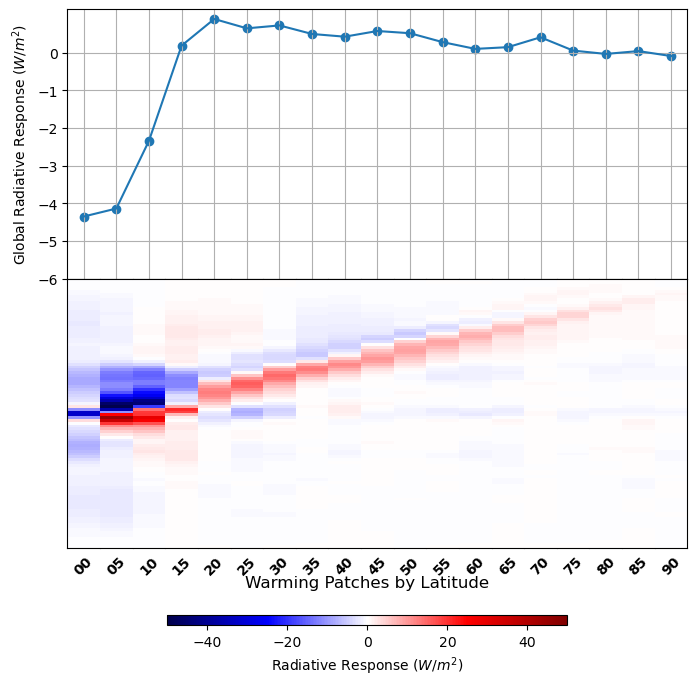

In [46]:
plt.rcParams['figure.figsize'] = [8,7]
fig = plt.figure()

gs = GridSpec(2, 19)
gs.update(wspace=0)

ax1 = fig.add_subplot(gs[0,:])
ax1.scatter(lats, dRw)
ax1.plot(lats, dRw)
ax1.set_xticks(lats, minor=False)
ax1.set_yticks([0,-1,-2,-3,-4,-5,-6], minor=False)
ax1.set_ylabel(r'Global Radiative Response ($W/m^2$)')
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-2.5,92.5)
ax1.grid(True)
for tick in ax1.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
mesh_plot(ax2,xdim_00,toamesh_00,"00")
ax3 = fig.add_subplot(gs[1,1])
mesh_plot(ax3,xdim_05,toamesh_05,"05")
ax4 = fig.add_subplot(gs[1,2])
mesh_plot(ax4,xdim_10,toamesh_10,"10")
ax5 = fig.add_subplot(gs[1,3])
mesh_plot(ax5,xdim_15,toamesh_15,"15")
ax6 = fig.add_subplot(gs[1,4])
mesh_plot(ax6,xdim_20,toamesh_20,"20")
ax7 = fig.add_subplot(gs[1,5])
mesh_plot(ax7,xdim_25,toamesh_25,"25")
ax8 = fig.add_subplot(gs[1,6])
mesh_plot(ax8,xdim_30,toamesh_30,"30")
ax9 = fig.add_subplot(gs[1,7])
mesh_plot(ax9,xdim_35,toamesh_35,"35")
ax10 = fig.add_subplot(gs[1,8])
mesh_plot(ax10,xdim_40,toamesh_40,"40")
ax11 = fig.add_subplot(gs[1,9])
mesh_plot(ax11,xdim_45,toamesh_45,"45")
ax12 = fig.add_subplot(gs[1,10])
mesh_plot(ax12,xdim_50,toamesh_50,"50")
ax13 = fig.add_subplot(gs[1,11])
mesh_plot(ax13,xdim_55,toamesh_55,"55")
ax14 = fig.add_subplot(gs[1,12])
mesh_plot(ax14,xdim_60,toamesh_60,"60")
ax15 = fig.add_subplot(gs[1,13])
mesh_plot(ax15,xdim_65,toamesh_65,"65")
ax16 = fig.add_subplot(gs[1,14])
mesh_plot(ax16,xdim_70,toamesh_70,"70")
ax17 = fig.add_subplot(gs[1,15])
mesh_plot(ax17,xdim_75,toamesh_75,"75")
ax18 = fig.add_subplot(gs[1,16])
mesh_plot(ax18,xdim_80,toamesh_80,"80")
ax19 = fig.add_subplot(gs[1,17])
mesh_plot(ax19,xdim_85,toamesh_85,"85")
ax20 = fig.add_subplot(gs[1,18])
mappable = mesh_plot(ax20,xdim_90,toamesh_90,"90")

#ax21 = fig.add_subplot(gs[1,19])
#divider = make_axes_locatable(ax21)
#colorbar_axes = divider.append_axes("right",
##                                    size="100%",
 #                                   pad=0.05)
#cax = fig.add_axes([0.9,0.125,0.015,0.375])
fig.supxlabel('Warming Patches by Latitude', y=0.05)
cax = fig.add_axes([0.25,0,0.5,0.015])
plt.subplots_adjust(wspace=0, hspace=0.0)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')
plt.show()

In [47]:
latlabels = ["00", "05", "10", "15", "20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80", "85", "90"]

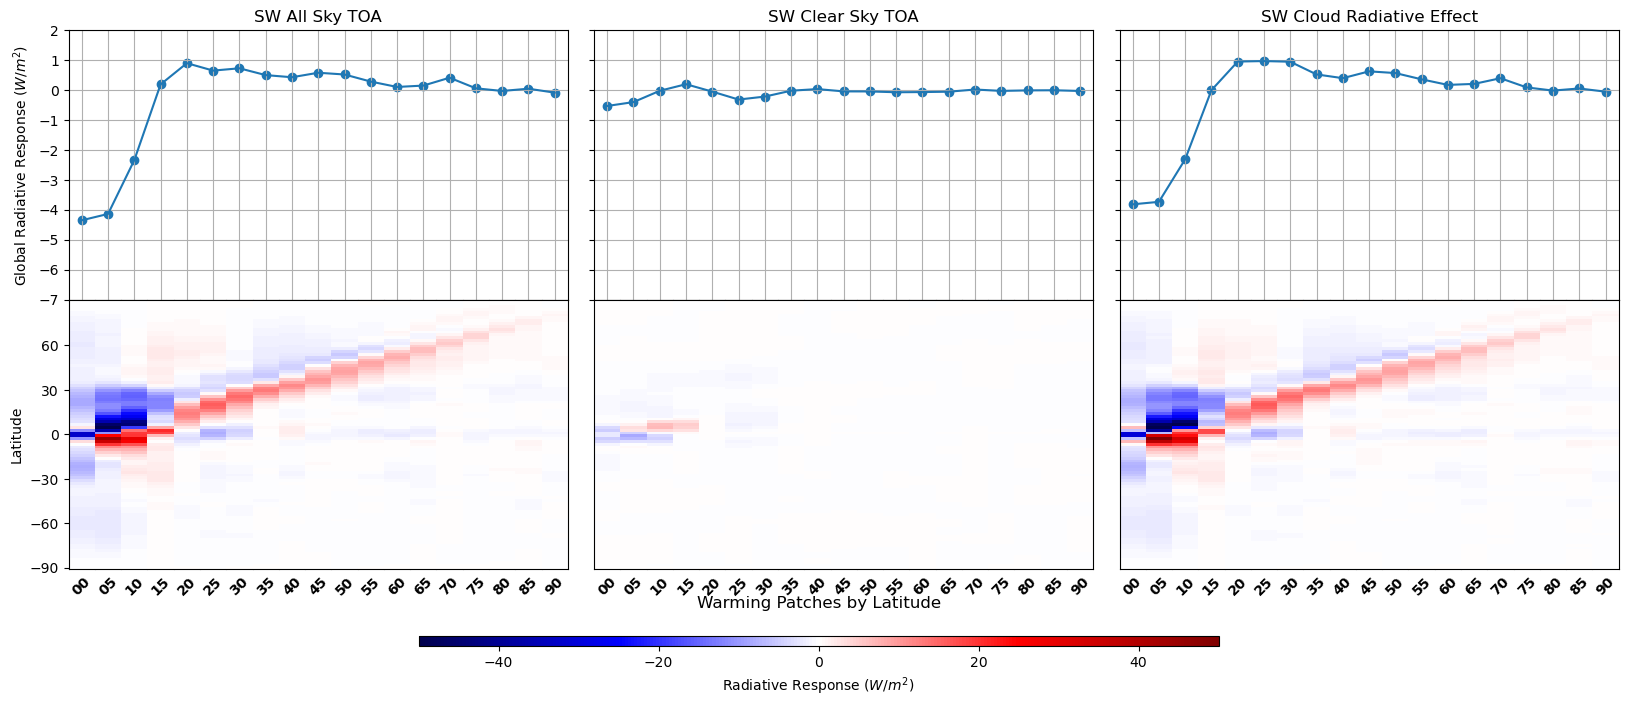

In [48]:
plt.rcParams['figure.figsize'] = [20,7]
fig = plt.figure()

gs = GridSpec(2, 59)
gs.update(wspace=0)

ax1 = fig.add_subplot(gs[0,:19])
ax1.scatter(lats, dRw)
ax1.plot(lats, dRw)
ax1.set_ylabel(r'Global Radiative Response ($W/m^2$)')
ax1.set_xticks(lats, minor=False)
ax1.set_yticks([2,1,0,-1,-2,-3,-4,-5,-6,-7], minor=False)
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-2.5,92.5)
ax1.set_ylim(-7,2)
ax1.grid(True)
ax1.set_title('SW All Sky TOA')
for tick in ax1.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

for num in range(0,19):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax,xdim_toa[num], mesh_toa[num], latlabels[num])

axempty1 = fig.add_subplot(gs[0,19])
axempty1.remove()

ax2 = fig.add_subplot(gs[0,20:39])    
ax2.scatter(lats, clr_list)
ax2.plot(lats, clr_list)
ax2.set_xticks(lats, minor=False)
ax2.set_yticks([2,1,0,-1,-2,-3,-4,-5,-6,-7], minor=False)
ax2.yaxis.grid(True, which='major')
ax2.xaxis.grid(True, which='major')
ax2.set_xlim(-2.5, 92.5)
ax2.set_ylim(-7,2)
ax2.grid(True)
ax2.set_title('SW Clear Sky TOA')
for tick in ax2.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
for num in range(20,39):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax, xdimclr[num-20], clrmesh[num-20], latlabels[num-20])
    
axempty2 = fig.add_subplot(gs[0,39])
axempty2.remove()

ax3 = fig.add_subplot(gs[0,40:])
ax3.scatter(lats, cre_list)
ax3.plot(lats, cre_list)
ax3.set_xticks(lats, minor=False)
ax3.set_yticks([2,1,0,-1,-2,-3,-4,-5,-6,-7], minor=False)
ax3.yaxis.grid(True, which='major')
ax3.xaxis.grid(True, which='major')
ax3.set_xlim(-2.5, 92.5)
ax3.set_ylim(-7,2)
ax3.grid(True)
ax3.set_title('SW Cloud Radiative Effect')
for tick in ax3.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax3.yaxis.get_major_ticks():
#     tick.tick1line.set_visible(False)
#     tick.tick2line.set_visible(False)
     tick.label1.set_visible(False)
     tick.label2.set_visible(False)    
    
for num in range(40,59):
    ax = fig.add_subplot(gs[1,num])
    mappable = mesh_plot(ax, xdimmesh[num-40], cremesh[num-40], latlabels[num-40])

fig.supxlabel('Warming Patches by Latitude', y=0.05)
cax = fig.add_axes([0.3,0,0.4,0.015])
plt.subplots_adjust(wspace=0, hspace=0.0)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')
plt.show()